Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv(r"C:\Users\DELL\Desktop\Superstore Dataset Analysis\Sample - Superstore.csv", encoding='ISO-8859-1')

# Preview the data
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

2.Basic Cleaning

In [18]:
# Check for missing values
print(df.isnull().sum())

# Remove missing rows if any
df.dropna(inplace=True)

# Convert dates
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Create time features
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year
df['Month_Year'] = df['Order Date'].dt.to_period('M')


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


3. Preprocessing

In [19]:
# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Create Month and Year columns
df['Month'] = df['Order Date'].dt.to_period('M')
df['Year'] = df['Order Date'].dt.year

# Basic cleaning (optional)
df.dropna(inplace=True)


Monthly/Yearly Sales Trend

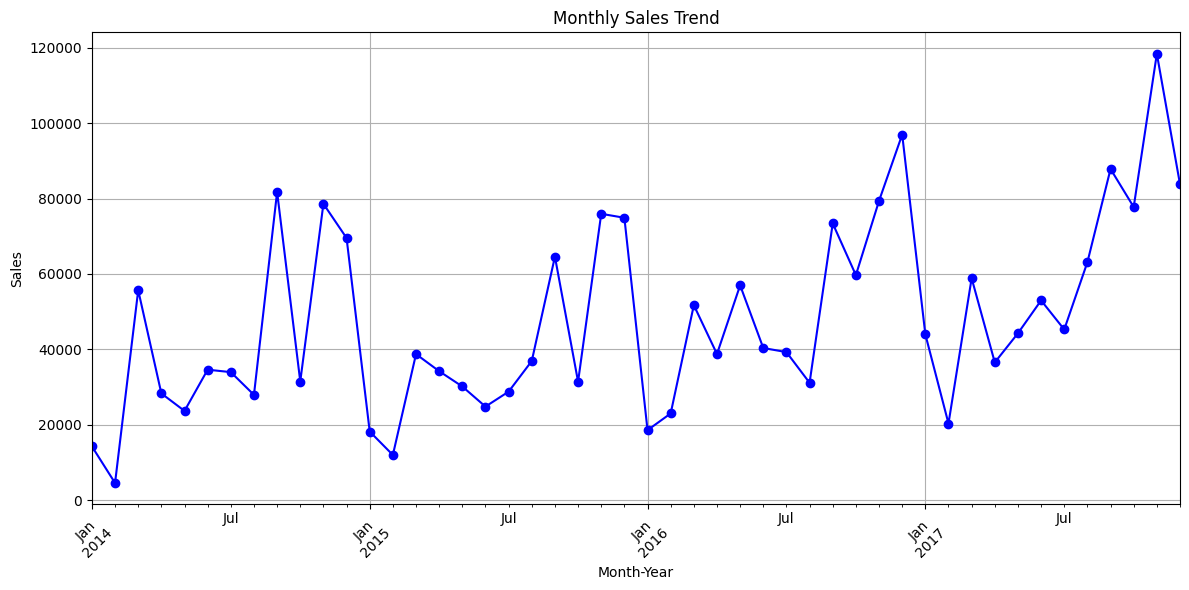

In [20]:
monthly_sales = df.groupby('Month_Year')['Sales'].sum()

plt.figure(figsize=(12,6))
monthly_sales.plot(kind='line', marker='o', color='blue')
plt.title("Monthly Sales Trend")
plt.xlabel("Month-Year")
plt.ylabel("Sales")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Top-Selling and Underperforming Products

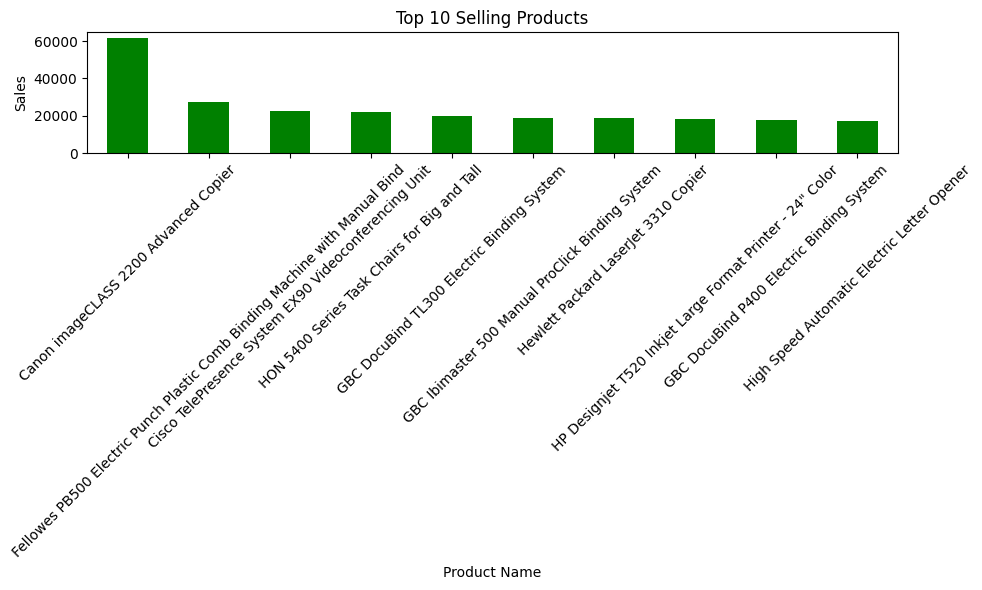

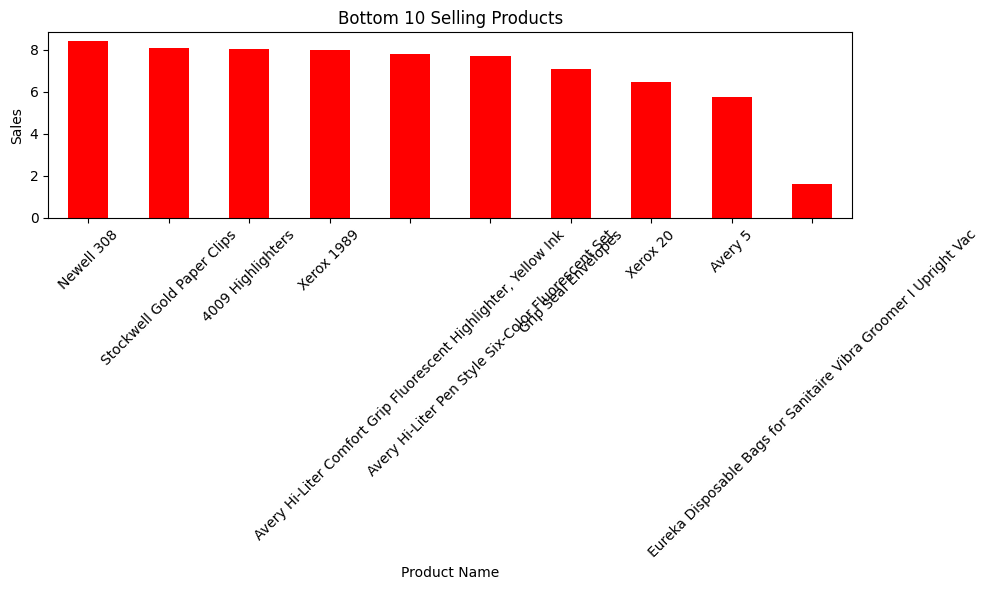

In [21]:
# Group by Product
product_sales = df.groupby('Product Name')['Sales'].sum().sort_values(ascending=False)

# Top 10
top_10 = product_sales.head(10)
bottom_10 = product_sales.tail(10)

# Plot Top
plt.figure(figsize=(10,6))
top_10.plot(kind='bar', color='green')
plt.title("Top 10 Selling Products")
plt.xticks(rotation=45)
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

# Plot Bottom
plt.figure(figsize=(10,6))
bottom_10.plot(kind='bar', color='red')
plt.title("Bottom 10 Selling Products")
plt.xticks(rotation=45)
plt.ylabel("Sales")
plt.tight_layout()
plt.show()


 Regional Sales & Profit

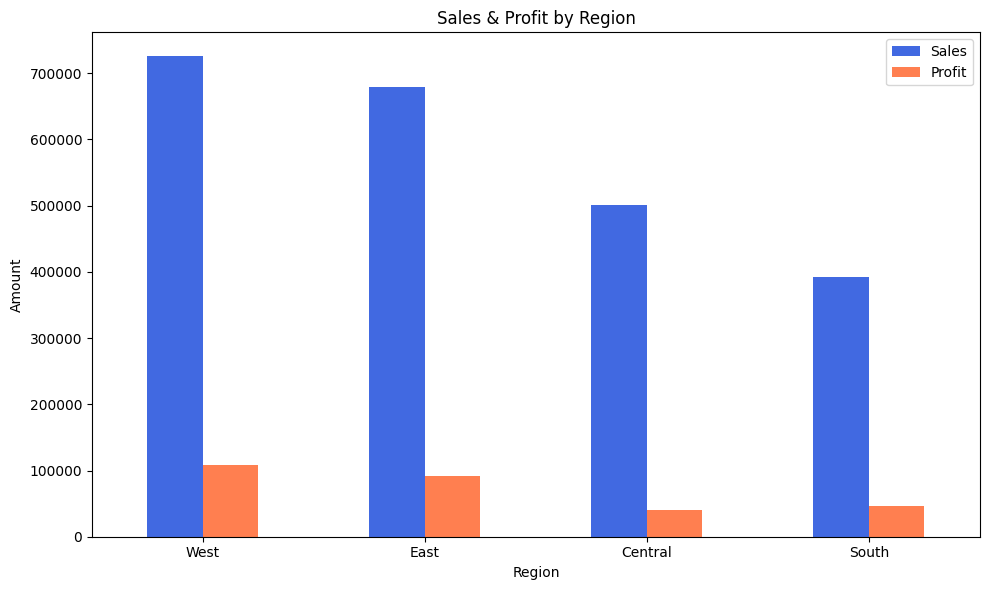

In [22]:
region_sales = df.groupby('Region')[['Sales', 'Profit']].sum().sort_values('Sales', ascending=False)

region_sales.plot(kind='bar', figsize=(10,6), color=['royalblue', 'coral'])
plt.title("Sales & Profit by Region")
plt.ylabel("Amount")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


Profit Distribution & Discount Impact

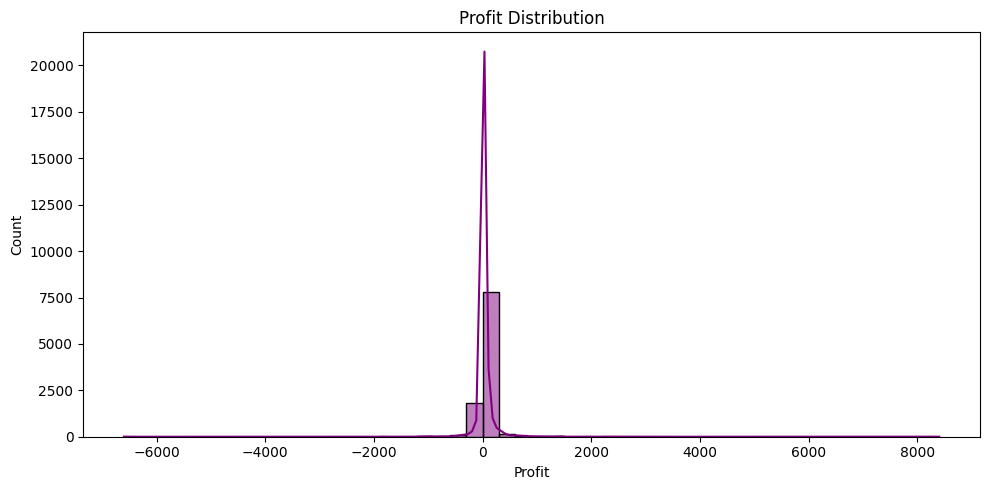

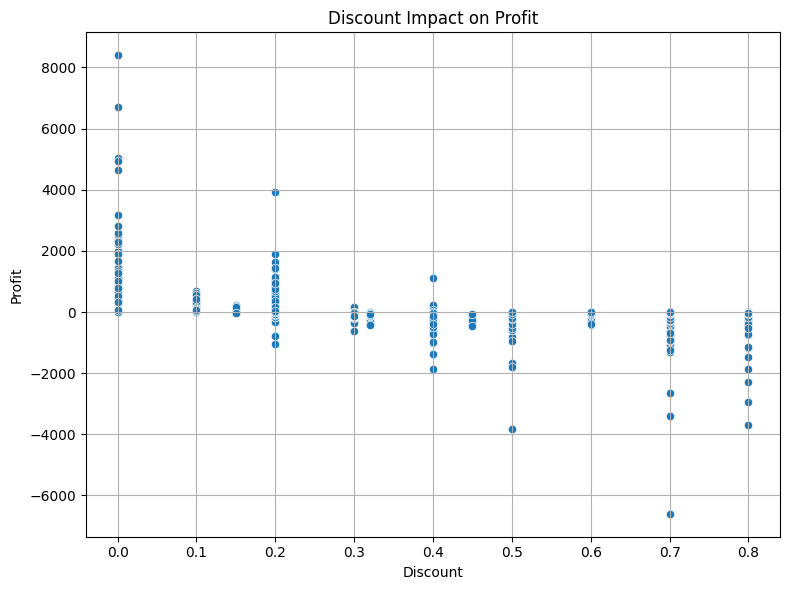

In [23]:
# Profit Histogram
plt.figure(figsize=(10,5))
sns.histplot(df['Profit'], bins=50, kde=True, color='purple')
plt.title("Profit Distribution")
plt.xlabel("Profit")
plt.tight_layout()
plt.show()

# Discount vs Profit Scatter
plt.figure(figsize=(8,6))
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title("Discount Impact on Profit")
plt.grid(True)
plt.tight_layout()
plt.show()


Correlation Heatmap

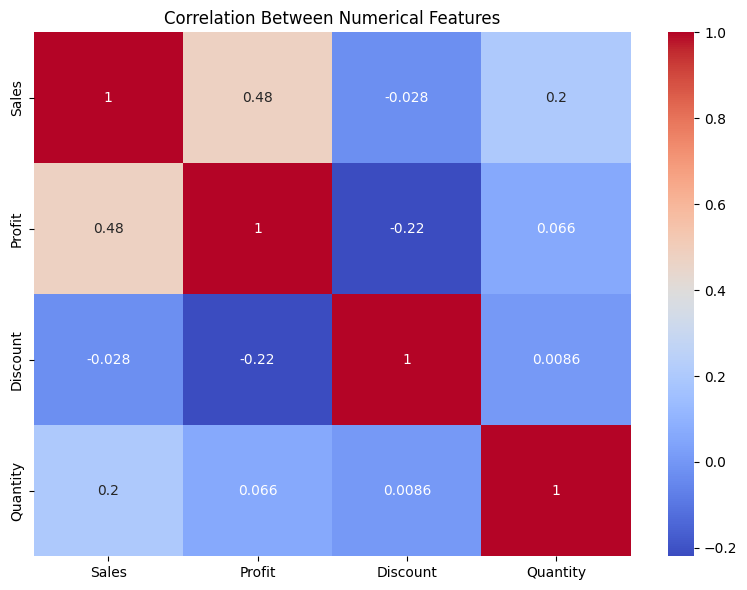

In [24]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['Sales', 'Profit', 'Discount', 'Quantity']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numerical Features")
plt.tight_layout()
plt.show()


Category & Segment Breakdown

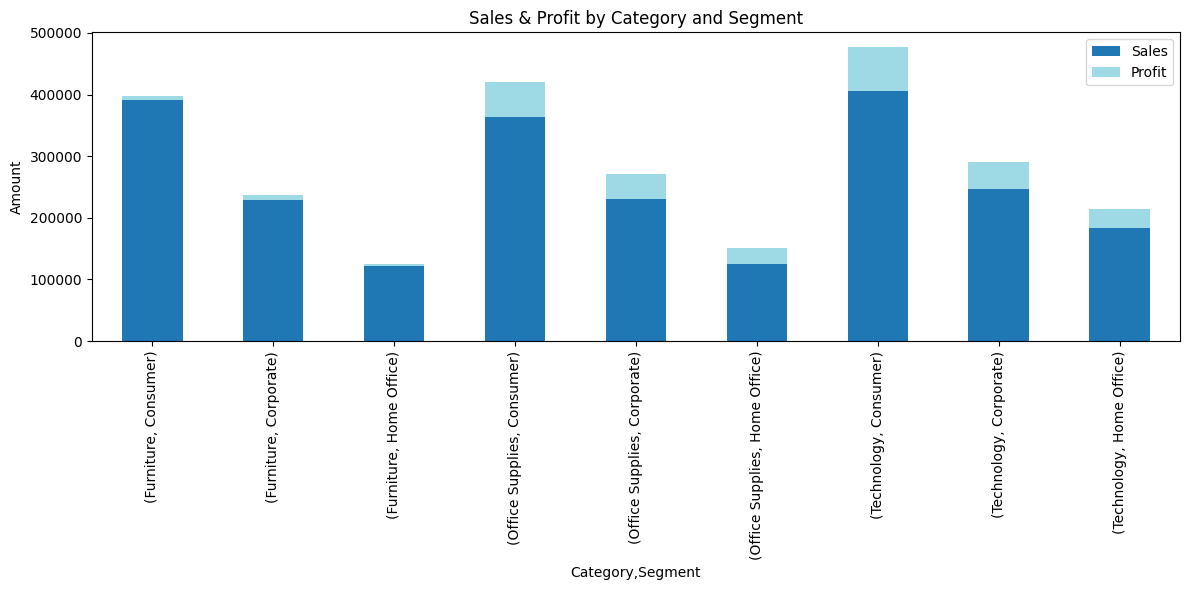

In [25]:
category_seg = df.groupby(['Category', 'Segment'])[['Sales', 'Profit']].sum()

category_seg.plot(kind='bar', figsize=(12,6), stacked=True, colormap='tab20')
plt.title("Sales & Profit by Category and Segment")
plt.ylabel("Amount")
plt.tight_layout()
plt.show()


Sales vs. Quantity Correlation (Product Demand Efficiency)

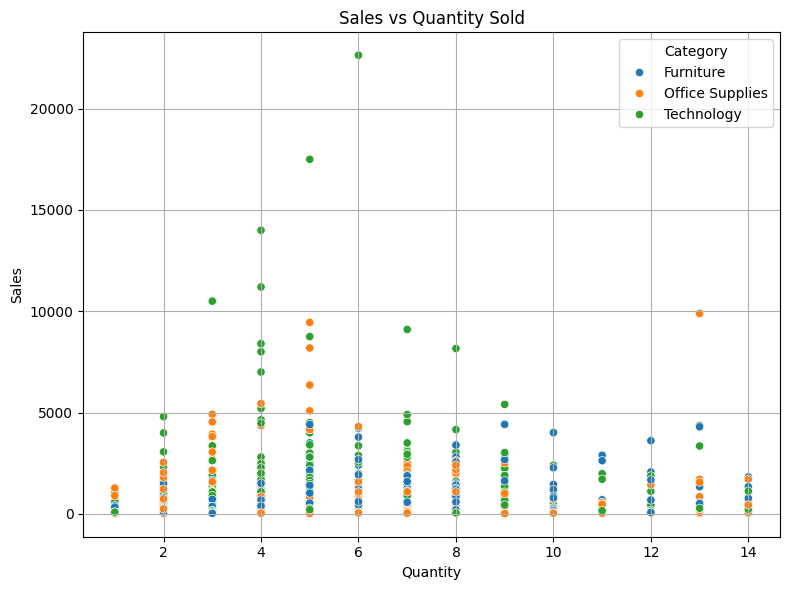

Correlation between Quantity and Sales: 0.20


In [26]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Quantity', y='Sales', data=df, hue='Category')
plt.title("Sales vs Quantity Sold")
plt.xlabel("Quantity")
plt.ylabel("Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlation coefficient
corr = df['Quantity'].corr(df['Sales'])
print(f"Correlation between Quantity and Sales: {corr:.2f}")


Category & Sub-Category Wise Profitability

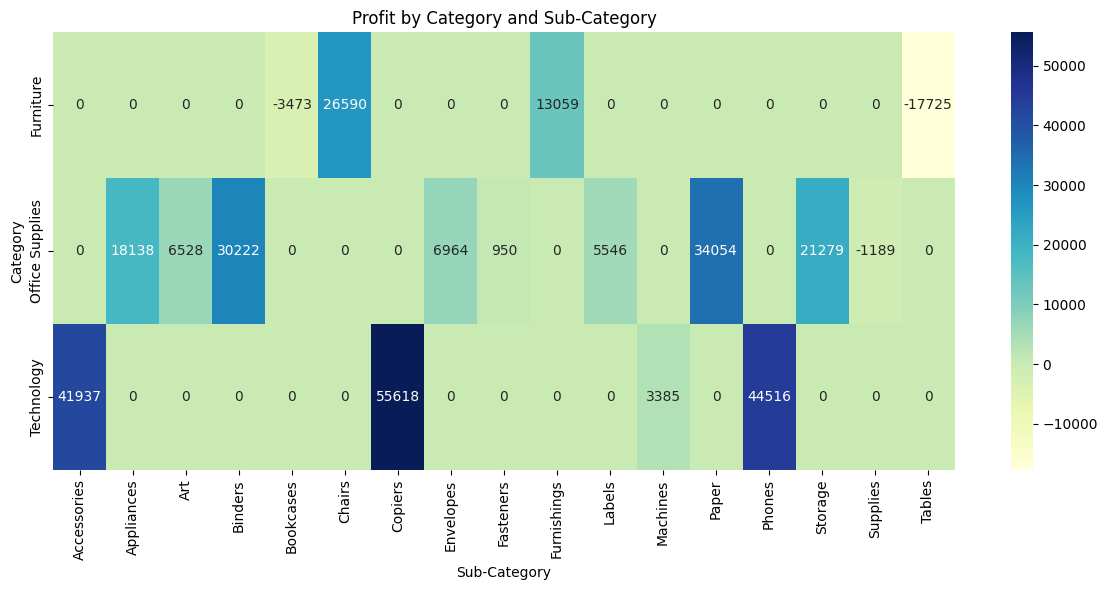

In [27]:
pivot_profit = pd.pivot_table(df, values='Profit', 
                              index='Category', 
                              columns='Sub-Category', 
                              aggfunc='sum', fill_value=0)

plt.figure(figsize=(12,6))
sns.heatmap(pivot_profit, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title("Profit by Category and Sub-Category")
plt.tight_layout()
plt.show()


Discount Impact on Profit

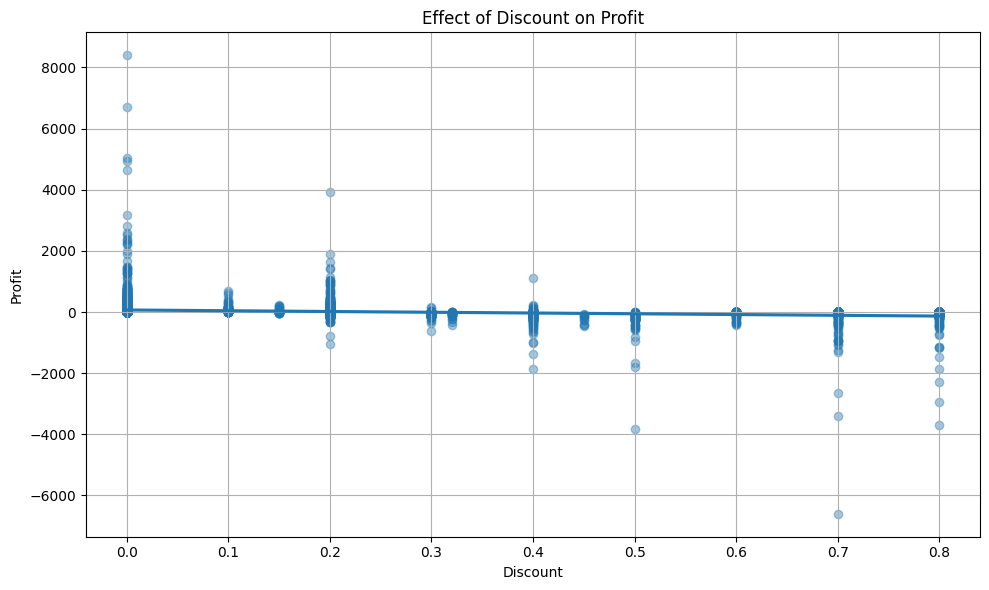

Correlation between Discount and Profit: -0.22


In [28]:
plt.figure(figsize=(10,6))
sns.regplot(x='Discount', y='Profit', data=df, scatter_kws={'alpha':0.4})
plt.title("Effect of Discount on Profit")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Correlation
print(f"Correlation between Discount and Profit: {df['Discount'].corr(df['Profit']):.2f}")


Shipping Mode Performance

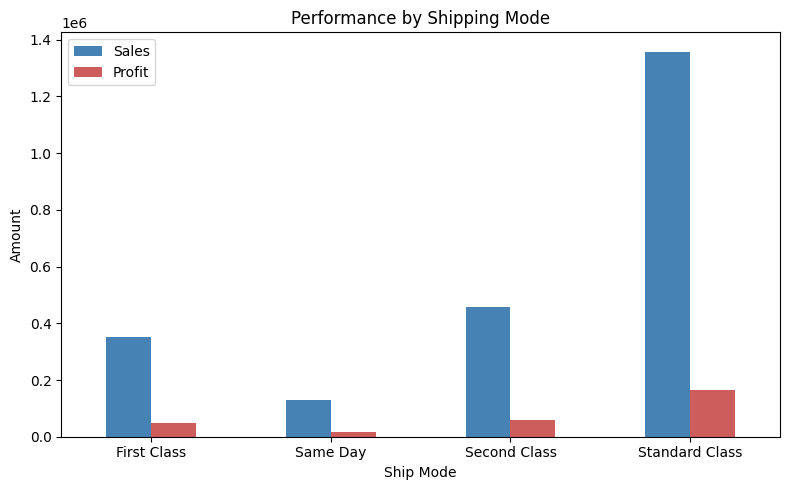

In [29]:
ship_perf = df.groupby('Ship Mode')[['Sales', 'Profit']].sum()

ship_perf.plot(kind='bar', figsize=(8,5), color=['steelblue', 'indianred'])
plt.title("Performance by Shipping Mode")
plt.ylabel("Amount")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


State-Level Profit Loss
Identify states with losses (profit < 0).

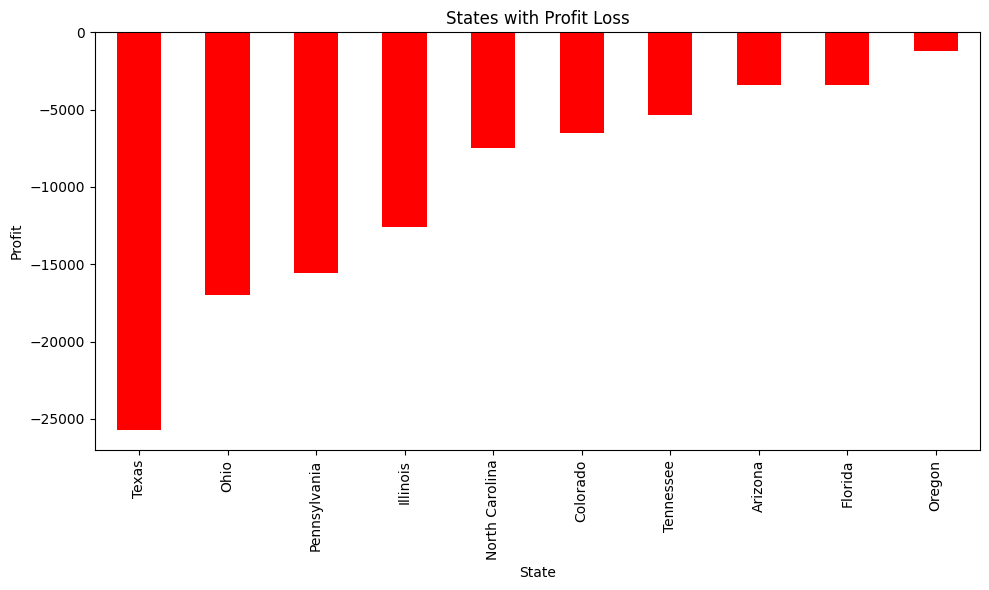

In [30]:
state_profit = df.groupby('State')['Profit'].sum().sort_values()

# Filter for loss-making states
loss_states = state_profit[state_profit < 0]

plt.figure(figsize=(10,6))
loss_states.plot(kind='bar', color='red')
plt.title("States with Profit Loss")
plt.ylabel("Profit")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Customer Segment Analysis

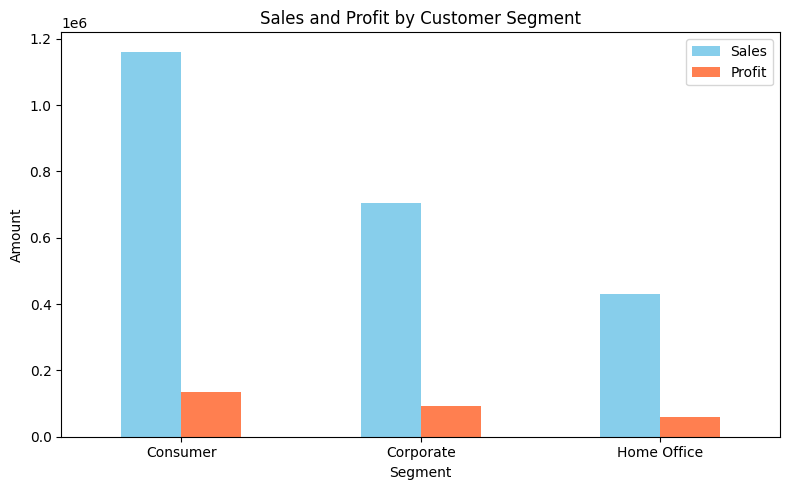

In [31]:
segment_analysis = df.groupby('Segment')[['Sales', 'Profit']].sum()

segment_analysis.plot(kind='bar', figsize=(8,5), color=['skyblue', 'coral'])
plt.title("Sales and Profit by Customer Segment")
plt.ylabel("Amount")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


RFM Analysis (Recency, Frequency, Monetary)

In [32]:
# Assume last date of data
latest_date = df['Order Date'].max()

# Aggregate RFM
rfm = df.groupby('Customer ID').agg({
    'Order Date': lambda x: (latest_date - x.max()).days,
    'Order ID': 'nunique',
    'Sales': 'sum'
}).rename(columns={
    'Order Date': 'Recency',
    'Order ID': 'Frequency',
    'Sales': 'Monetary'
})

# Normalize scores (optional)
rfm['R_Score'] = pd.qcut(rfm['Recency'], 4, labels=[4,3,2,1])
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), 4, labels=[1,2,3,4])
rfm['M_Score'] = pd.qcut(rfm['Monetary'], 4, labels=[1,2,3,4])

# Combine to RFM Score
rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)

print(rfm.head())


             Recency  Frequency  Monetary R_Score F_Score M_Score RFM_Segment
Customer ID                                                                  
AA-10315         184          5  5563.560       1       1       4         114
AA-10375          19          9  1056.390       4       4       1         441
AA-10480         259          4  1790.512       1       1       2         112
AA-10645          55          6  5086.935       3       2       4         324
AB-10015         415          3   886.156       1       1       1         111


Save Key Insights to CSV

In [ ]:
# Save key summary
summary_df = df.groupby('Category')[['Sales', 'Profit']].sum()
summary_df.to_csv("category_summary.csv")




summary_df.to_csv
